This notebook is based on https://www.youtube.com/watch?v=LXz7__lHn8k&t=129s and this original version run with no bugs

### Installs & Imports

In [1]:
pip install gym-anytrading stable_baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 18.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gymnasium as gym
import gym_anytrading
from gym_anytrading.envs import Actions

from stable_baselines3 import A2C

#import quantstats as qs

## Data Wrangle

In [3]:
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK

df = gym_anytrading.datasets.FOREX_EURUSD_1H_ASK.copy()

df

,Open,High,Low,Close,Volume
Time,,,,,
01.01.2017 22:00:00.000,1.05236,1.05253,1.05221,1.05227,1.435400e+08
01.01.2017 23:00:00.000,1.05227,1.05426,1.05226,1.05282,2.531400e+08
02.01.2017 00:00:00.000,1.05283,1.05283,1.05268,1.05281,1.314000e+08
02.01.2017 01:00:00.000,1.05282,1.05286,1.05225,1.05240,2.739400e+08
02.01.2017 02:00:00.000,1.05239,1.05240,1.05164,1.05220,2.581400e+08
...,...,...,...,...,...
29.12.2017 17:00:00.000,1.20224,1.20257,1.20191,1.20218,9.283300e+09
29.12.2017 18:00:00.000,1.20218,1.20242,1.20122,1.20139,7.366750e+09
29.12.2017 19:00:00.000,1.20139,1.20144,1.20073,1.20096,7.205770e+09


In [ ]:
# no need to use yfinance to get the data
import yfinance as yf

raw = yf.download('EURUSD=X')
raw

## Make Environment & Agent

In [4]:
window_size = 10
start_index = window_size
end_index = len(df)

env = gym.make(
    'forex-v0',
    df=df,
    window_size=window_size,
    frame_bound=(start_index, end_index)
)

print("observation_space:", env.observation_space)

observation_space: Box(-10000000000.0, 10000000000.0, (10, 2), float32)


In [5]:
env.reset()
model = A2C('MlpPolicy', env, verbose=0)
model.learn(total_timesteps=10000)

## Test Agent

In [6]:
action_stats = {Actions.Sell: 0, Actions.Buy: 0}

observation, info = env.reset()

while True:
    # action = env.action_space.sample()
    action, _states = model.predict(observation)

    action_stats[Actions(action)] += 1
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # env.render()
    if done:
        break

env.close()

print("action_stats:", action_stats)
print("info:", info)

action_stats: {<Actions.Sell: 0>: 6085, <Actions.Buy: 1>: 129}
info: {'total_reward': -1319.2057609558105, 'total_profit': 0.8474927036196424, 'position': <Positions.Short: 0>}


# Evaluate

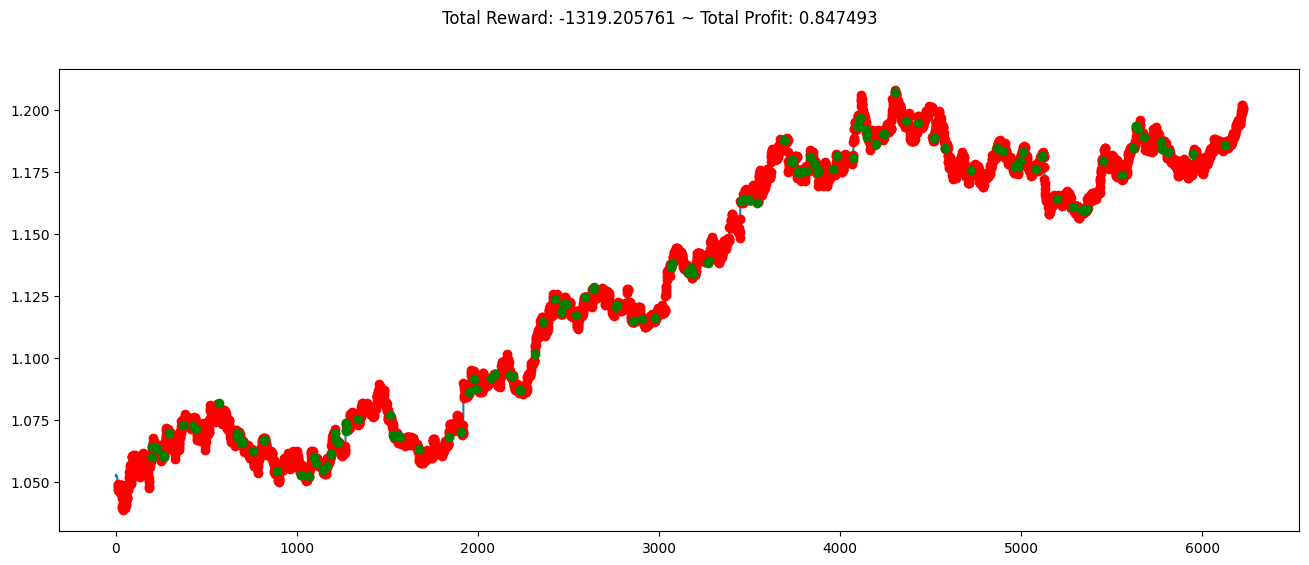

In [7]:
plt.figure(figsize=(16, 6))
env.unwrapped.render_all()
plt.show()

# Consider Joining the Newsletter

Get updateds on new videos, code, and discounts on future products / services


https://witty-motivator-1414.ck.page/acb393f729